In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
AAPL = pd.read_csv('AAPLM.csv')
SPY = pd.read_csv('SP500.csv')
tenyear = pd.read_csv('tenyear.csv')
bill_rates = pd.read_csv('bill_rates.csv')

In [3]:
bill_rates = bill_rates.rename(columns = {'DATE' : 'Date', 'DGS1MO' : '1_mo'})
bill_rates['Date'] = pd.to_datetime(bill_rates['Date'])

In [4]:
def keeper(x,y):
    return x.loc[:,y]

In [5]:
def renamer(x,y):
    return x.rename(columns = {'Close':y})

In [6]:
AAPL = keeper(AAPL, ['Close', 'Date'])
SPY = keeper(SPY, ['Close', 'Date'])

In [7]:
AAPL = renamer(AAPL,'AAPL')
SPY = renamer(SPY,'SPY')

In [8]:
CAPM = pd.merge(AAPL,bill_rates, left_index = True, right_index = True)
CAPM = pd.merge(CAPM, SPY, left_index = True, right_index = True)

In [9]:
CAPM = CAPM.drop(['Date_x','Date_y','Date'], axis = 1)

In [10]:
CAPM['1_mo'] = CAPM['1_mo'].apply(lambda x: (x/100))
CAPM['AAPL'] = CAPM['AAPL'].pct_change()
CAPM['SPY'] = CAPM['SPY'].pct_change()

In [11]:
CAPM = CAPM.drop([0])

In [12]:
CAPM = CAPM.reset_index().drop('index', axis = 1)

In [13]:
returns = CAPM

In [14]:
returns['XAAPL'] = returns['AAPL'] - returns['1_mo']
returns['XSPY'] = returns['SPY'] - returns['1_mo']

In [15]:
X = returns['XSPY'].dropna().values.reshape(-1,1)
y = returns['XAAPL'].dropna().values.reshape(-1,1)

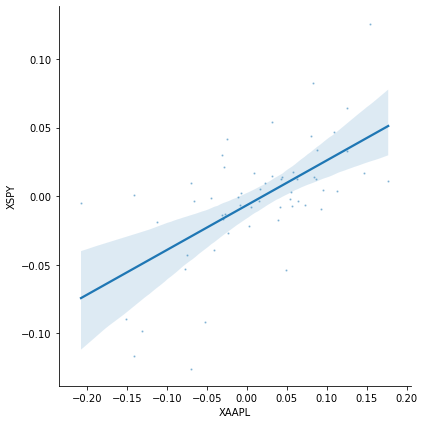

In [16]:
sb.lmplot(
    data=returns, x="XAAPL", y="XSPY", height=6,
    scatter_kws=dict(s=1.5, alpha=0.35)
);

In [17]:
from sklearn.linear_model import LinearRegression

# construct the model instance
CAPM_model = LinearRegression()
CAPM_model.fit(X,y)

# print the coefficients
beta_0 = CAPM_model.intercept_
beta_1 = CAPM_model.coef_[0]
print(beta_0)
print(beta_1)


[0.01539948]
[1.16757621]


In [18]:
returns

,AAPL,1_mo,SPY,XAAPL,XSPY
0,-0.023202,0.0000,-0.026443,-0.023202,-0.026443
1,0.083409,0.0001,0.082983,0.083309,0.082883
2,-0.010042,0.0011,0.000505,-0.011142,-0.000595
3,-0.110228,0.0014,-0.017530,-0.111628,-0.018930
4,-0.075242,0.0022,-0.050735,-0.077442,-0.052935
5,-0.006678,0.0023,-0.004128,-0.008978,-0.006428
6,0.127211,0.0018,0.065991,0.125411,0.064191
7,-0.139921,0.0016,0.002699,-0.141521,0.001099
8,0.065287,0.0027,0.015325,0.062587,0.012625
9,-0.042660,0.0020,0.000911,-0.044660,-0.001089
